In [0]:

from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
import xgboost as xgb

In [0]:
import sklearn

In [0]:
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

In [0]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns

In [9]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [0]:
import io

In [0]:
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [37]:
print (df.shape)

(3333, 21)


In [16]:
df.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


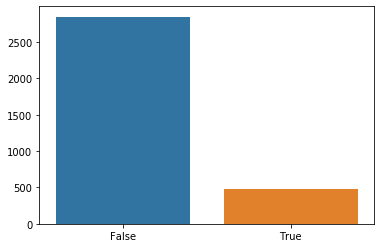

In [18]:
y = df["churn"].value_counts()
#print (y)
sns.barplot(y.index, y.values)

In [20]:
df['churn'].value_counts(normalize = True)
#df['churn'].value_counts(normalize=True).mul(100).astype(str)+'%'



False    0.855086
True     0.144914
Name: churn, dtype: float64

In [21]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


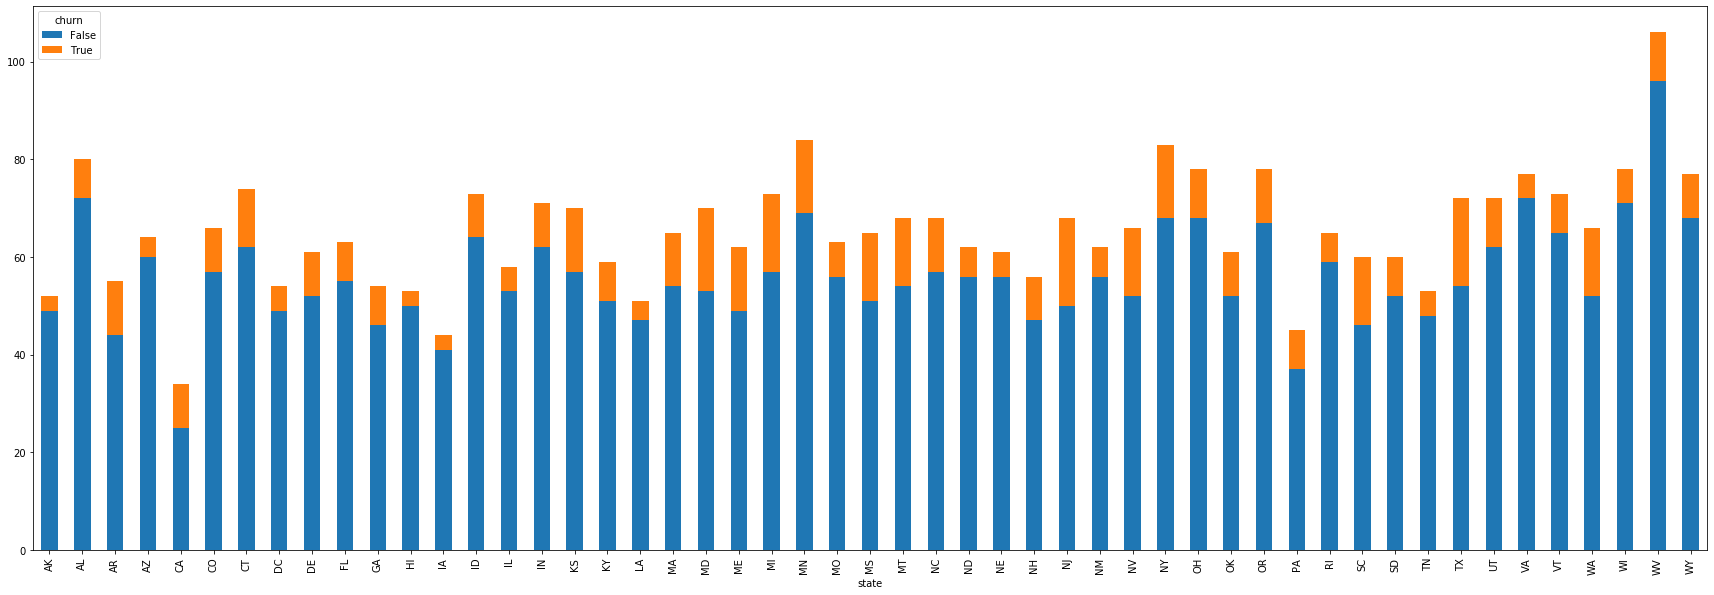

In [24]:
df.groupby(["state", "churn"]).size().unstack().plot(kind = 'bar' ,stacked = True , figsize =(30,10))

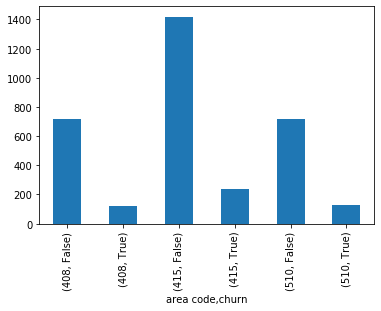

In [60]:
df.groupby(['area code','churn']).size().plot(kind = 'bar')

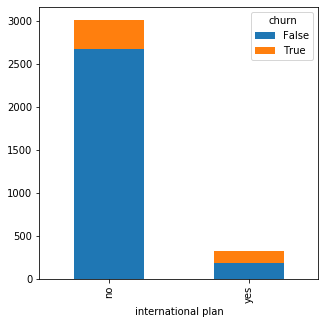

In [63]:
df.groupby(["international plan", "churn"]).size().unstack().plot(kind = 'bar' ,stacked = True , figsize =(5,5))

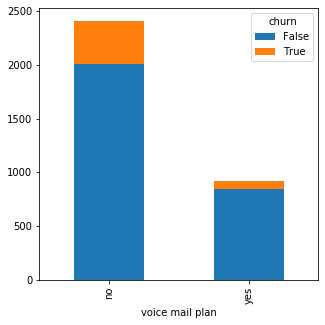

In [64]:
df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

In [25]:
print(df.dtypes)

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [0]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [0]:
label_encoder = preprocessing.LabelEncoder()

In [32]:
df['state'] = label_encoder.fit_transform(df['state'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])

#print (df['Voice mail plan'][:4])
print (df.dtypes)

state                       int64
account length              int64
area code                   int64
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
dtype: object


In [72]:
df.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [29]:
y = df['churn'].as_matrix().astype(np.int)
y.size


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


3333

In [0]:
df.drop(["phone number","churn"], axis = 1, inplace=True)

In [33]:
X = df.as_matrix().astype(np.float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [34]:
X

array([[ 16.  , 128.  , 415.  , ...,   3.  ,   2.7 ,   1.  ],
       [ 35.  , 107.  , 415.  , ...,   3.  ,   3.7 ,   1.  ],
       [ 31.  , 137.  , 415.  , ...,   5.  ,   3.29,   0.  ],
       ...,
       [ 39.  ,  28.  , 510.  , ...,   6.  ,   3.81,   2.  ],
       [  6.  , 184.  , 510.  , ...,  10.  ,   1.35,   2.  ],
       [ 42.  ,  74.  , 415.  , ...,   4.  ,   3.7 ,   0.  ]])

In [0]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [36]:
X

array([[-0.6786493 ,  0.67648946, -0.52360328, ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.6031696 ,  0.14906505, -0.52360328, ..., -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.33331299,  0.9025285 , -0.52360328, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ...,
       [ 0.87302621, -1.83505538,  1.71881732, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [-1.35329082,  2.08295458,  1.71881732, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [ 1.07541867, -0.67974475, -0.52360328, ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

In [63]:
sklearn.show_versions()


System:
    python: 3.6.9 (default, Nov  7 2019, 10:44:02)  [GCC 8.3.0]
executable: /usr/bin/python3
   machine: Linux-4.14.137+-x86_64-with-Ubuntu-18.04-bionic

Python deps:
       pip: 19.3.1
setuptools: 42.0.2
   sklearn: 0.21.3
     numpy: 1.17.4
     scipy: 1.3.3
    Cython: 0.29.14
    pandas: 0.25.3


In [0]:
import sklearn.model_selection  

def stratified_cv(X, y, clf_class, shuffle=True):
    stratified_k_fold = sklearn.model_selection.StratifiedKFold( n_splits=5, shuffle=False, random_state=None)
    y_pred = y.copy()
    # ii -> train
    # jj -> test indices
    for ii, jj in stratified_k_fold.split(X,y): 
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class()
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred
   

In [0]:

# run block of code and catch warnings
with warnings.catch_warnings():
	# ignore all caught warnings
	warnings.filterwarnings("ignore")
	# execute code that will generate warnings
	...
1
2
1
2
3
4
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
3
4
5
6
# run block of code and catch warnings
with warnings.catch_warnings():
	# ignore all caught warnings
	warnings.filterwarnings("ignore")
	# execute code that will generate warnings

In [0]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [83]:
print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))
print('XGboost:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, xgb.XGBClassifier))))
print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, svm.SVC))))
print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))
print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, linear_model.LogisticRegression))))

Gradient Boosting Classifier:  0.95
XGboost:           0.95
Support vector machine(SVM):   0.92
Random Forest Classifier:      0.94
K Nearest Neighbor Classifier: 0.89
Logistic Regression:           0.86


In [84]:
print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))
print('XGboost:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, xgb.XGBClassifier))))
print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, svm.SVC))))
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, linear_model.LogisticRegression))))

Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2850
           1       0.92      0.74      0.82       483

    accuracy                           0.95      3333
   macro avg       0.94      0.86      0.89      3333
weighted avg       0.95      0.95      0.95      3333


XGboost:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2850
           1       0.94      0.72      0.81       483

    accuracy                           0.95      3333
   macro avg       0.94      0.86      0.89      3333
weighted avg       0.95      0.95      0.95      3333


Support vector machine(SVM):
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      2850
           1       0.86      0.49      0.63       483

    accuracy                           0.92      3333
   macro avg       0.89      0.74      0.79      3333
w